In [3]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
dfa = pd.read_csv("../petition_data_all.csv")

In [5]:
df = pd.read_csv("approval_rating.csv")
df

,day,korea_gallop,real_meter,approval_rating,investigation_num
0,2017-05-03,no,81.6%,81.60,1
1,2017-05-04,no,84.1%,84.10,1
2,2017-05-05,no,78.1%,78.10,1
3,2017-06-01,84.0%,78.9%,81.45,2
4,2017-06-02,82.0%,75.6%,78.80,2
5,2017-06-03,83.0%,74.2%,78.60,2
6,2017-06-04,79.0%,75.3%,77.15,2
7,2017-07-01,83.0%,76.6%,79.80,2
8,2017-07-02,80.0%,74.6%,77.30,2
9,2017-07-03,74.0%,72.4%,73.20,2


In [6]:
test =  list(df[df["approval_rating"]>0]["approval_rating"])
stop_num = [20, 55]
dd = [i for i in range(88) if i not in stop_num]
daylist = list(df[df["approval_rating"]>0]["day"])
days = [i for i in daylist if i not in list(df[df["approval_rating"]==0]["day"])]

### 그래프 제작

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl           # 그래프를 그리는 모듈

%matplotlib inline  
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Darwin': 
    font_url = "/Library/Fonts/AppleGothic.ttf"
elif platform.system() == 'Windows': 
    font_url = 'C:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Linux': 
    font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname = font_url).get_name()

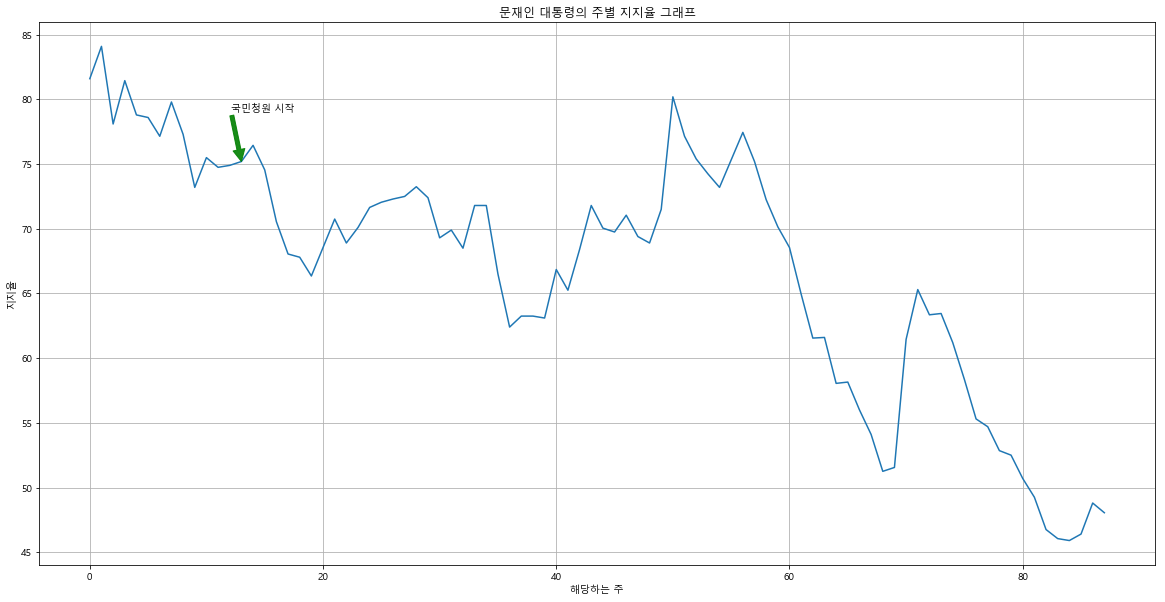

In [8]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(dd,test)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")
plt.annotate('국민청원 시작',
             xy=(13,75.2), 
             xytext=(-10, +50), textcoords='offset points', arrowprops = dict(color= 'g', alpha = 0.9))

plt.show()

### 해당주 : 요일 로 만들기

In [9]:
import datetime

In [10]:
days

['2017-05-03',
 '2017-05-04',
 '2017-05-05',
 '2017-06-01',
 '2017-06-02',
 '2017-06-03',
 '2017-06-04',
 '2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-08-01',
 '2017-08-02',
 '2017-08-03',
 '2017-08-04',
 '2017-08-05',
 '2017-09-01',
 '2017-09-02',
 '2017-09-03',
 '2017-09-04',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-02-01',
 '2018-02-02',
 '2018-02-03',
 '2018-02-04',
 '2018-02-05',
 '2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-04',
 '2018-08-01',
 '2018-08-02',
 '2018-08-03',
 '2018-08-04',
 '2018-08-05',
 '2018-09-

In [11]:
def weekDay(today):
    year = int(today[:4])
    month = int(today[5:7])
    day = int(today[8:10])
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return week[int(dayOfWeek)]

> https://code.i-harness.com/ko-kr/q/257f0 함수 출처

In [12]:
weekDay('2017-08-05')

'Saturday'

In [13]:
dfa

,num,category,start-days,end-days,person,progress,title,count,petition_overview
0,21,안전/환경,2017-08-19,2017-11-17,kakao - ***,청원종료,스텔라 데이지호에 대한 제안입니다.,9,\n\t\t\t\t\t\t\t\t\t\t\t스텔라 데이지호에 대한 제안입니다. \n...
1,22,기타,2017-08-19,2017-11-17,kakao - ***,청원종료,비리제보처를 만들어주세요.,17,\n\t\t\t\t\t\t\t\t\t\t\t현 정부에 국민들이 가장 원하는 것은 부...
2,23,미래,2017-08-19,2017-09-03,kakao - ***,청원종료,제2의 개성공단,0,\n\t\t\t\t\t\t\t\t\t\t\t만일 하시는 대통령님 및 각 부처 장관님...
3,24,일자리,2017-08-19,2017-08-26,kakao - ***,청원종료,공공기관 무조건적인 정규직전환을 반대합니다.,53,\n\t\t\t\t\t\t\t\t\t\t\t현정부에서 정규직 일자리를 늘리는 것에 ...
4,25,미래,2017-08-19,2017-09-03,kakao - ***,청원종료,제2의 개성공단,0,\n\t\t\t\t\t\t\t\t\t\t\t만일 하시는 대통령님 및 각 부처 장관님...
5,26,보건복지,2017-08-19,2017-08-26,naver - ***,청원종료,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,2,\n\t\t\t\t\t\t\t\t\t\t\t청원인 왕 기 운 \n\t\t\t\t\...
6,27,정치개혁,2017-08-19,2017-09-18,naver - ***,청원종료,김이수 헌재소장 임명 재고 건의,1,\n\t\t\t\t\t\t\t\t\t\t\t문 대통령님께 묻습니다 (2017. 8....
7,28,경제민주화,2017-08-19,2017-08-26,naver - ***,청원종료,소액주주를 보호해주십시오,2137,\n\t\t\t\t\t\t\t\t\t\t\t** 존경하옵는 문재인대통령님께 \n...
8,29,미래,2017-08-19,2017-09-18,naver - ***,청원종료,문재인 정부는 왜 공무원개혁엔 무관심한가?,3,\n\t\t\t\t\t\t\t\t\t\t\t살충제 계란 사건으로 국민들을 불안케 하...
9,30,일자리,2017-08-19,2017-11-17,kakao - ***,청원종료,A/S 기사들도 관심을 가져주십시요,1,\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요. 저는 LG전자 서비스센터에서...


In [14]:
set(dfa["start-days"])

{'2017-08-19',
 '2017-08-20',
 '2017-08-21',
 '2017-08-22',
 '2017-08-23',
 '2017-08-24',
 '2017-08-25',
 '2017-08-26',
 '2017-08-27',
 '2017-08-28',
 '2017-08-29',
 '2017-08-30',
 '2017-08-31',
 '2017-09-01',
 '2017-09-02',
 '2017-09-03',
 '2017-09-04',
 '2017-09-05',
 '2017-09-06',
 '2017-09-07',
 '2017-09-08',
 '2017-09-09',
 '2017-09-10',
 '2017-09-11',
 '2017-09-12',
 '2017-09-13',
 '2017-09-14',
 '2017-09-15',
 '2017-09-16',
 '2017-09-17',
 '2017-09-18',
 '2017-09-19',
 '2017-09-20',
 '2017-09-21',
 '2017-09-22',
 '2017-09-23',
 '2017-09-24',
 '2017-09-25',
 '2017-09-26',
 '2017-09-27',
 '2017-09-28',
 '2017-09-29',
 '2017-09-30',
 '2017-10-01',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-07',
 '2017-10-08',
 '2017-10-09',
 '2017-10-10',
 '2017-10-11',
 '2017-10-12',
 '2017-10-13',
 '2017-10-14',
 '2017-10-15',
 '2017-10-16',
 '2017-10-17',
 '2017-10-18',
 '2017-10-19',
 '2017-10-20',
 '2017-10-21',
 '2017-10-22',
 '2017-10-23',
 '2017-10-

In [15]:
'2017-08-04',  '2019-01-01'

('2017-08-04', '2019-01-01')

In [16]:
days.index('2017-08-04'), days.index('2019-01-01')

(14, 83)

In [17]:
day_indexs = days[days.index('2017-08-04'):days.index('2019-01-01')]
day_indexs

['2017-08-04',
 '2017-08-05',
 '2017-09-01',
 '2017-09-02',
 '2017-09-03',
 '2017-09-04',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-02-01',
 '2018-02-02',
 '2018-02-03',
 '2018-02-04',
 '2018-02-05',
 '2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-04',
 '2018-08-01',
 '2018-08-02',
 '2018-08-03',
 '2018-08-04',
 '2018-08-05',
 '2018-09-01',
 '2018-09-02',
 '2018-09-03',
 '2018-09-04',
 '2018-10-01',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-05',
 '2018-11-01',
 '2018-11-02',
 '2018-11-03',
 '2018-11-04',
 '2018-12-01',
 '2018-12-

In [18]:
weeks = []
week = []
for d in sorted(set(dfa["start-days"])):
    week.append(d)
    if week[0][5:7] != d[5:7]:
        print(d)
        week = week[:-1]
        weeks.append(week)
        week = [d]
    if weekDay(d) == 'Sunday':
        print(d)
        weeks.append(week)
        week = []
aa = ['2018-12-31',
 '2019-01-01']
weeks.append(aa)

2017-08-20
2017-08-27
2017-09-01
2017-09-03
2017-09-10
2017-09-17
2017-09-24
2017-10-01
2017-10-01
2017-10-08
2017-10-15
2017-10-22
2017-10-29
2017-11-01
2017-11-05
2017-11-12
2017-11-19
2017-11-26
2017-12-01
2017-12-03
2017-12-10
2017-12-17
2017-12-24
2017-12-31
2018-01-07
2018-01-14
2018-01-21
2018-01-28
2018-02-01
2018-02-04
2018-02-11
2018-02-18
2018-02-25
2018-03-01
2018-03-04
2018-03-11
2018-03-18
2018-03-25
2018-04-01
2018-04-01
2018-04-08
2018-04-15
2018-04-22
2018-04-29
2018-05-01
2018-05-06
2018-05-13
2018-05-20
2018-05-27
2018-06-01
2018-06-03
2018-06-10
2018-06-17
2018-06-24
2018-07-01
2018-07-01
2018-07-08
2018-07-15
2018-07-22
2018-07-29
2018-08-01
2018-08-05
2018-08-12
2018-08-19
2018-08-26
2018-09-01
2018-09-02
2018-09-09
2018-09-16
2018-09-23
2018-09-30
2018-10-07
2018-10-14
2018-10-21
2018-10-28
2018-11-01
2018-11-04
2018-11-11
2018-11-18
2018-11-25
2018-12-01
2018-12-02
2018-12-09
2018-12-16
2018-12-23
2018-12-30
2019-01-01


In [19]:
weeks

[['2017-08-19', '2017-08-20'],
 ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 ['2017-09-01', '2017-09-02', '2017-09-03'],
 ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 ['2017-10-01'],
 ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 ['2017-10-09',
  '2017-10-10',
  '2017-10-11',
  '2017-10-12',
  '2017-10-13',
  '2017-10-14',
  '2017-10-15'],
 ['2017-10-16',
  '2017-10-17',
  '2017-10-18',
  '2017-10-19',
  '2017-1

In [20]:
day_indexs

['2017-08-04',
 '2017-08-05',
 '2017-09-01',
 '2017-09-02',
 '2017-09-03',
 '2017-09-04',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-02-01',
 '2018-02-02',
 '2018-02-03',
 '2018-02-04',
 '2018-02-05',
 '2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-04-01',
 '2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-05-01',
 '2018-05-02',
 '2018-05-03',
 '2018-05-04',
 '2018-05-05',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-07-01',
 '2018-07-02',
 '2018-07-03',
 '2018-07-04',
 '2018-08-01',
 '2018-08-02',
 '2018-08-03',
 '2018-08-04',
 '2018-08-05',
 '2018-09-01',
 '2018-09-02',
 '2018-09-03',
 '2018-09-04',
 '2018-10-01',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-05',
 '2018-11-01',
 '2018-11-02',
 '2018-11-03',
 '2018-11-04',
 '2018-12-01',
 '2018-12-

In [21]:
week_dict = {}
for www, wlt in zip(day_indexs,weeks):
    week_dict[www] = wlt

In [22]:
week_dict

{'2017-08-04': ['2017-08-19', '2017-08-20'],
 '2017-08-05': ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 '2017-09-01': ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 '2017-09-02': ['2017-09-01', '2017-09-02', '2017-09-03'],
 '2017-09-03': ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 '2017-09-04': ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 '2017-10-02': ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 '2017-10-03': ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 '2017-10-04': ['2017-10-01'],
 '2017-11-01': ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 '2017-11-02': ['2017-10-09',
  '2017-10-10',


In [23]:
week_dict

{'2017-08-04': ['2017-08-19', '2017-08-20'],
 '2017-08-05': ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 '2017-09-01': ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 '2017-09-02': ['2017-09-01', '2017-09-02', '2017-09-03'],
 '2017-09-03': ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 '2017-09-04': ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 '2017-10-02': ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 '2017-10-03': ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 '2017-10-04': ['2017-10-01'],
 '2017-11-01': ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 '2017-11-02': ['2017-10-09',
  '2017-10-10',


## week_dict 저장

In [24]:
week_dict

{'2017-08-04': ['2017-08-19', '2017-08-20'],
 '2017-08-05': ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 '2017-09-01': ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 '2017-09-02': ['2017-09-01', '2017-09-02', '2017-09-03'],
 '2017-09-03': ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 '2017-09-04': ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 '2017-10-02': ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 '2017-10-03': ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 '2017-10-04': ['2017-10-01'],
 '2017-11-01': ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 '2017-11-02': ['2017-10-09',
  '2017-10-10',


In [25]:
week_list = []
day_list = []
for i in week_dict:
    week_list.append(i)
    day_list.append(','.join(week_dict[i]))

In [26]:
week_list, day_list

(['2017-08-04',
  '2017-08-05',
  '2017-09-01',
  '2017-09-02',
  '2017-09-03',
  '2017-09-04',
  '2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-11-01',
  '2017-11-02',
  '2017-11-03',
  '2017-11-04',
  '2017-11-05',
  '2017-12-01',
  '2017-12-02',
  '2017-12-03',
  '2017-12-04',
  '2018-01-01',
  '2018-01-02',
  '2018-01-03',
  '2018-01-04',
  '2018-02-01',
  '2018-02-02',
  '2018-02-03',
  '2018-02-04',
  '2018-02-05',
  '2018-03-01',
  '2018-03-02',
  '2018-03-03',
  '2018-03-04',
  '2018-04-01',
  '2018-04-02',
  '2018-04-03',
  '2018-04-04',
  '2018-05-01',
  '2018-05-02',
  '2018-05-03',
  '2018-05-04',
  '2018-05-05',
  '2018-06-02',
  '2018-06-03',
  '2018-06-04',
  '2018-07-01',
  '2018-07-02',
  '2018-07-03',
  '2018-07-04',
  '2018-08-01',
  '2018-08-02',
  '2018-08-03',
  '2018-08-04',
  '2018-08-05',
  '2018-09-01',
  '2018-09-02',
  '2018-09-03',
  '2018-09-04',
  '2018-10-01',
  '2018-10-02',
  '2018-10-03',
  '2018-10-04',
  '2018-10-05',
  '2018-11-01',
  '2018-

In [27]:
my_dict = {"week": week_list, "days" : day_list}
wdf = pd.DataFrame(my_dict)
wdf

,week,days
0,2017-08-04,"2017-08-19,2017-08-20"
1,2017-08-05,"2017-08-21,2017-08-22,2017-08-23,2017-08-24,20..."
2,2017-09-01,"2017-08-28,2017-08-29,2017-08-30,2017-08-31"
3,2017-09-02,"2017-09-01,2017-09-02,2017-09-03"
4,2017-09-03,"2017-09-04,2017-09-05,2017-09-06,2017-09-07,20..."
5,2017-09-04,"2017-09-11,2017-09-12,2017-09-13,2017-09-14,20..."
6,2017-10-02,"2017-09-18,2017-09-19,2017-09-20,2017-09-21,20..."
7,2017-10-03,"2017-09-25,2017-09-26,2017-09-27,2017-09-28,20..."
8,2017-10-04,2017-10-01
9,2017-11-01,"2017-10-02,2017-10-03,2017-10-04,2017-10-05,20..."


In [28]:
wdf.to_csv("week_dict.csv",index=False)

In [29]:
wdf = pd.read_csv("week_dict.csv")
wdf

,week,days
0,2017-08-04,"2017-08-19,2017-08-20"
1,2017-08-05,"2017-08-21,2017-08-22,2017-08-23,2017-08-24,20..."
2,2017-09-01,"2017-08-28,2017-08-29,2017-08-30,2017-08-31"
3,2017-09-02,"2017-09-01,2017-09-02,2017-09-03"
4,2017-09-03,"2017-09-04,2017-09-05,2017-09-06,2017-09-07,20..."
5,2017-09-04,"2017-09-11,2017-09-12,2017-09-13,2017-09-14,20..."
6,2017-10-02,"2017-09-18,2017-09-19,2017-09-20,2017-09-21,20..."
7,2017-10-03,"2017-09-25,2017-09-26,2017-09-27,2017-09-28,20..."
8,2017-10-04,2017-10-01
9,2017-11-01,"2017-10-02,2017-10-03,2017-10-04,2017-10-05,20..."


In [30]:
wdf = pd.read_csv("week_dict.csv")
week_dict = {}
for row in wdf.itertuples(index=True, name='Pandas'):
    week_dict[getattr(row, "week")] = getattr(row, "days").split(',')
week_dict

{'2017-08-04': ['2017-08-19', '2017-08-20'],
 '2017-08-05': ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 '2017-09-01': ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 '2017-09-02': ['2017-09-01', '2017-09-02', '2017-09-03'],
 '2017-09-03': ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 '2017-09-04': ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 '2017-10-02': ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 '2017-10-03': ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 '2017-10-04': ['2017-10-01'],
 '2017-11-01': ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 '2017-11-02': ['2017-10-09',
  '2017-10-10',


In [31]:
week_dict

{'2017-08-04': ['2017-08-19', '2017-08-20'],
 '2017-08-05': ['2017-08-21',
  '2017-08-22',
  '2017-08-23',
  '2017-08-24',
  '2017-08-25',
  '2017-08-26',
  '2017-08-27'],
 '2017-09-01': ['2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
 '2017-09-02': ['2017-09-01', '2017-09-02', '2017-09-03'],
 '2017-09-03': ['2017-09-04',
  '2017-09-05',
  '2017-09-06',
  '2017-09-07',
  '2017-09-08',
  '2017-09-09',
  '2017-09-10'],
 '2017-09-04': ['2017-09-11',
  '2017-09-12',
  '2017-09-13',
  '2017-09-14',
  '2017-09-15',
  '2017-09-16',
  '2017-09-17'],
 '2017-10-02': ['2017-09-18',
  '2017-09-19',
  '2017-09-20',
  '2017-09-21',
  '2017-09-22',
  '2017-09-23',
  '2017-09-24'],
 '2017-10-03': ['2017-09-25',
  '2017-09-26',
  '2017-09-27',
  '2017-09-28',
  '2017-09-29',
  '2017-09-30'],
 '2017-10-04': ['2017-10-01'],
 '2017-11-01': ['2017-10-02',
  '2017-10-03',
  '2017-10-04',
  '2017-10-05',
  '2017-10-06',
  '2017-10-07',
  '2017-10-08'],
 '2017-11-02': ['2017-10-09',
  '2017-10-10',


In [32]:
wdf.to_dict()

{'week': {0: '2017-08-04',
  1: '2017-08-05',
  2: '2017-09-01',
  3: '2017-09-02',
  4: '2017-09-03',
  5: '2017-09-04',
  6: '2017-10-02',
  7: '2017-10-03',
  8: '2017-10-04',
  9: '2017-11-01',
  10: '2017-11-02',
  11: '2017-11-03',
  12: '2017-11-04',
  13: '2017-11-05',
  14: '2017-12-01',
  15: '2017-12-02',
  16: '2017-12-03',
  17: '2017-12-04',
  18: '2018-01-01',
  19: '2018-01-02',
  20: '2018-01-03',
  21: '2018-01-04',
  22: '2018-02-01',
  23: '2018-02-02',
  24: '2018-02-03',
  25: '2018-02-04',
  26: '2018-02-05',
  27: '2018-03-01',
  28: '2018-03-02',
  29: '2018-03-03',
  30: '2018-03-04',
  31: '2018-04-01',
  32: '2018-04-02',
  33: '2018-04-03',
  34: '2018-04-04',
  35: '2018-05-01',
  36: '2018-05-02',
  37: '2018-05-03',
  38: '2018-05-04',
  39: '2018-05-05',
  40: '2018-06-02',
  41: '2018-06-03',
  42: '2018-06-04',
  43: '2018-07-01',
  44: '2018-07-02',
  45: '2018-07-03',
  46: '2018-07-04',
  47: '2018-08-01',
  48: '2018-08-02',
  49: '2018-08-03',
  

## 분석시작

In [169]:
test_index = dfa[dfa["num"]==0]
for wd in week_dict['2017-09-04']:
    test_index = test_index.append(dfa[dfa["start-days"] == wd])
test_index

,num,category,start-days,end-days,person,progress,title,count,petition_overview
13184,13257,기타,2017-09-11,2017-09-26,naver - ***,청원종료,청와대 관람을 희망합니다.,0,\n\t\t\t\t\t\t\t\t\t\t\t먼저 국민청원 게시판에 글을 올리게 되어...
13185,13258,인권/성평등,2017-09-11,2017-09-26,facebook - ***,청원종료,메갈리안 사이트를 삭제해주세요,3,"\n\t\t\t\t\t\t\t\t\t\t\t최근 메갈리아라는 여성 우월 주위, 남자..."
13186,13259,기타,2017-09-11,2017-09-18,naver - ***,청원종료,청년법폐지,1,\n\t\t\t\t\t\t\t\t\t\t\t잔인무도한 청소년들에 무분별한 만행이 더...
13187,13260,인권/성평등,2017-09-11,2017-12-10,facebook - ***,청원종료,중•고등학생들에게 의복의 자유를 주세요!,2,\n\t\t\t\t\t\t\t\t\t\t\t1980년대 우리나라는 중•고등학생들에게...
13188,13261,육아/교육,2017-09-11,2017-12-10,naver - ***,청원종료,"장애인의 교육받을 권리, 특수학교 건립으로 되찾아주십시오.",259,\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까? \n\t\t\t\t\t\...
13189,13262,인권/성평등,2017-09-11,2017-10-11,naver - ***,청원종료,아르바이트생 인권 보장을 위한 '갑질 금지법'을 청원합니다.,3,\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요 대통령님. \n\t\t\t\t...
13190,13263,외교/통일/국방,2017-09-11,2017-11-10,kakao - ***,청원종료,"평창동계올림픽 숙박비 1박에 100만원, 괜찮은건가요??",0,\n\t\t\t\t\t\t\t\t\t\t\t[평창 동계올림픽 시즌 평창 숙소 1박이...
13191,13266,일자리,2017-09-11,2017-10-11,kakao - ***,청원종료,대형쇼핑몰 규제를 반대합니다.,1,\n\t\t\t\t\t\t\t\t\t\t\t대형쇼핑몰 오히려 활성화 시켜야 하고 ...
13192,13267,외교/통일/국방,2017-09-11,2017-12-10,naver - ***,청원종료,THAAD 철수와 송유중단 쌍방거래,0,\n\t\t\t\t\t\t\t\t\t\t\t사드철수와 송유중단 쌍방거래 \n\n\t...
13193,13268,교통/건축/국토,2017-09-11,2017-10-11,naver - ***,청원종료,정부는 교통법규위반 처벌수위 강화 및 자동차대란을 막아야 할 것입니다.,1,\n\t\t\t\t\t\t\t\t\t\t\t정부는 교통법규위반 처벌수위 강화 및 자...


In [170]:
br = pd.read_csv("briefing.csv")
br

,num,category,start-days,end-days,person,progress,title,count,petition_overview,petition_answer
0,1785,인권/성평등,2017-09-03,2017-11-02,naver - ***,브리핑,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,"참여인원 : [ 296,330명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 청소년보호법...,\n\n윤영찬 수석 : 안녕하세요. 친절한 청와대 진행을 맡은 윤영찬 국민소통수석입...
1,10949,미래,2017-09-06,2017-12-05,facebook - ***,브리핑,조두순 출소반대,"참여인원 : [ 615,354명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t제발 조두순 재심다시해서 ...,\n\n▲고민정 부대변인 : 안녕하세요. '11시 50분 청와대입니다.' 저는 청와...
2,18278,인권/성평등,2017-09-30,2017-10-30,naver - ***,브리핑,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,"참여인원 : [ 235,372명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요. 존경하는 대통...,"\n\n- 낙태죄 폐지 청원은 “원치 않는 출산은 여성은 물론 태어나는 아이, 국가..."
3,26024,안전/환경,2017-11-04,2017-12-04,facebook - ***,브리핑,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"참여인원 : [ 216,774명 ]","\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t'주취감형'이란, 술을 먹...",\n\n▲고민정 부대변인 : 안녕하세요. '11시 50분 청와대입니다.' 저는 청와...
4,45581,보건복지,2017-11-17,2017-12-17,kakao - ***,브리핑,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","참여인원 : [ 281,985명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t청원사항) \r\n\t\...,\n\n▲박능후 보건복지부 장관 : 이번 청원에 답을 하기 위해서 현장을 많이 방문...
5,49083,기타,2017-11-24,2017-12-24,naver - ***,브리핑,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","참여인원 : [ 211,064명 ]","\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t3년 이하의 징역, 또는3...",\n\n안녕하세요. 산업정책비서관 채희봉입니다. 전기·생활용품안전관리법을 개정 또는...
6,57132,성장동력,2017-12-03,2018-01-02,naver - ***,브리핑,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),"참여인원 : [ 255,554명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t2017년 1월 28일부터...,\n\n안녕하세요. 산업정책비서관 채희봉입니다. 전기·생활용품안전관리법을 개정 또는...
7,76020,성장동력,2017-12-28,2018-01-27,kakao - ***,브리핑,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,"참여인원 : [ 228,295명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t저는 정부에게 묻고 싶습니...,"\n\nQ. 안녕하세요. 뉴미디어비서관 정혜승입니다. 친절한 청와대, 오늘은 <가상..."
8,79162,인권/성평등,2018-01-03,2018-02-02,naver - ***,브리핑,미성년자 성폭행 형량 올려주세요 종신형원합니다,"참여인원 : [ 233,842명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t또 창원에서 조두순사건과 ...,\n\nQ : 안녕하세요. 뉴미디어비서관실 김선 행정관입니다. 오늘 <11시 50분...
9,81026,인권/성평등,2018-01-06,2018-02-05,naver - ***,브리핑,초.중.고 학교 페미니즘교육 의무화,"참여인원 : [ 213,219명 ]",\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t아직 판단이 무분별한 어린...,"\n\nQ : 안녕하세요. ‘11시50분 청와대입니다‘, 오늘도 국민청원에 대한 답..."


In [171]:
br["petition_overview"] += br["petition_answer"]

## 방법 찾기

In [172]:
for i in list(br["num"]):
    dfa[dfa["num"]==i]["petition_overview"] = br[br["num"]==i]["petition_overview"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## ㄴㄴ

In [173]:
br = br.drop('petition_answer', 1)

In [174]:
import re

In [175]:
def find_int(count):
    i = (re.findall(r'\d+', count))
    ints = int(''.join(map(str, i)))
    return ints

In [176]:
br["count"] = br["count"].map(find_int)
br

,num,category,start-days,end-days,person,progress,title,count,petition_overview
0,1785,인권/성평등,2017-09-03,2017-11-02,naver - ***,브리핑,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,296330,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 청소년보호법...
1,10949,미래,2017-09-06,2017-12-05,facebook - ***,브리핑,조두순 출소반대,615354,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t제발 조두순 재심다시해서 ...
2,18278,인권/성평등,2017-09-30,2017-10-30,naver - ***,브리핑,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,235372,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요. 존경하는 대통...
3,26024,안전/환경,2017-11-04,2017-12-04,facebook - ***,브리핑,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,216774,"\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t'주취감형'이란, 술을 먹..."
4,45581,보건복지,2017-11-17,2017-12-17,kakao - ***,브리핑,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원",281985,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t청원사항) \r\n\t\...
5,49083,기타,2017-11-24,2017-12-24,naver - ***,브리핑,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!",211064,"\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t3년 이하의 징역, 또는3..."
6,57132,성장동력,2017-12-03,2018-01-02,naver - ***,브리핑,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),255554,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t2017년 1월 28일부터...
7,76020,성장동력,2017-12-28,2018-01-27,kakao - ***,브리핑,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,228295,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t저는 정부에게 묻고 싶습니...
8,79162,인권/성평등,2018-01-03,2018-02-02,naver - ***,브리핑,미성년자 성폭행 형량 올려주세요 종신형원합니다,233842,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t또 창원에서 조두순사건과 ...
9,81026,인권/성평등,2018-01-06,2018-02-05,naver - ***,브리핑,초.중.고 학교 페미니즘교육 의무화,213219,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t아직 판단이 무분별한 어린...


In [177]:
dfa = dfa.drop(dfa[dfa.progress == "브리핑 "].index)



In [178]:
dfa = dfa.append(br)

In [179]:
dfa[dfa["num"]==1785]

,num,category,start-days,end-days,person,progress,title,count,petition_overview
0,1785,인권/성평등,2017-09-03,2017-11-02,naver - ***,브리핑,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,296330,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 청소년보호법...


In [180]:
dfa[dfa["count"]>200000]

,num,category,start-days,end-days,person,progress,title,count,petition_overview
312080,408154,교통/건축/국토,2018-10-16,2018-11-15,naver - ***,청원종료,카풀반대,216448,\n\t\t\t\t\t\t\t\t\t\t\t불법카풀을 허용을 반대합니다. \n\t\...
313972,410524,안전/환경,2018-10-18,2018-11-17,naver - ***,청원종료,심신미약 피의자에 의해 죽게된 우리 딸 억울하지 않게 해주세요,216834,\n\t\t\t\t\t\t\t\t\t\t\t저는 억울하게 죽게된 딸의 아빠입니다. ...
335695,437737,인권/성평등,2018-11-09,2018-12-09,naver - ***,청원종료,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,397079,\n\t\t\t\t\t\t\t\t\t\t\t46일동안 눈 한번 뜨시지 못한 채 11...
344830,449519,안전/환경,2018-11-22,2018-12-22,naver - ***,청원종료,"중국 알루미늄공장,막아주세요",216615,"\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요 대통령님, \n\t\t\t\t..."
348382,454045,반려동물,2018-11-27,2018-12-27,naver - ***,청원종료,도살장에서 망치로 머리를 맞던 개가 잠시 튀어나가 옆에있는 자신의 새끼에게 젖물리며...,214251,\n\t\t\t\t\t\t\t\t\t\t\t아래의 링크를 봐주세요 \n\t\t\t\...
354724,462623,정치개혁,2018-12-07,2019-01-06,naver - ***,청원진행중,국회의원 내년 연봉 2000만원 인상 추진..최저임금 인상률보다 높은 14%.. 셀...,231057,\n\t\t\t\t\t\t\t\t\t\t\t국회의원 내년 연봉 2000만원 인상 추...
0,1785,인권/성평등,2017-09-03,2017-11-02,naver - ***,브리핑,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,296330,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 청소년보호법...
1,10949,미래,2017-09-06,2017-12-05,facebook - ***,브리핑,조두순 출소반대,615354,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t제발 조두순 재심다시해서 ...
2,18278,인권/성평등,2017-09-30,2017-10-30,naver - ***,브리핑,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,235372,\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t안녕하세요. 존경하는 대통...
3,26024,안전/환경,2017-11-04,2017-12-04,facebook - ***,브리핑,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,216774,"\n\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t'주취감형'이란, 술을 먹..."


In [181]:
dfa[dfa["count"]>10000]

,num,category,start-days,end-days,person,progress,title,count,petition_overview
21,43,육아/교육,2017-08-19,2017-09-18,naver - ***,청원종료,기간제 교사의 정규직화를 반대합니다.,11293,"\n\t\t\t\t\t\t\t\t\t\t\t대통령님, 안녕하세요. 저는 임용을 준비..."
552,580,육아/교육,2017-08-26,2017-09-02,kakao - ***,청원종료,유아교육법 제 24조 2항에 명시된 '원칙'을 지켜주시기를 바랍니다.,34318,\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. 저는 '나라다운 나라'라는...
871,899,외교/통일/국방,2017-08-30,2017-09-14,naver - ***,청원종료,남성만의 실질적 독박 국방의무 이행에서 벗어나 여성도 의무 이행에 동참하도록 법률개...,123204,\n\t\t\t\t\t\t\t\t\t\t\t우리나라에선 아주 나중엔 모병으로 방향을...
1141,1170,인권/성평등,2017-08-31,2017-11-29,naver - ***,청원종료,여자 집값 70% 지원정책 폐지,34750,\n\t\t\t\t\t\t\t\t\t\t\t현재 진행중인 1인가구 여성 임대주택 7...
1490,1520,인권/성평등,2017-09-02,2017-10-02,naver - ***,청원종료,시골 남성들에 대한 매매혼 지원금 지급 중지를 바랍니다.,13370,"\n\t\t\t\t\t\t\t\t\t\t\t시골 노총각들의 매매혼, 국제결혼이라는 ..."
1582,1613,육아/교육,2017-09-02,2017-12-01,naver - ***,청원종료,사립유치원 보육료 인상등 집회 반대합니다,10729,\n\t\t\t\t\t\t\t\t\t\t\t전국 사립 유치원단은 무상교육이라는 명분...
1764,1798,인권/성평등,2017-09-03,2017-11-02,naver - ***,청원종료,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,125343,\n\t\t\t\t\t\t\t\t\t\t\t안녕하십니까. [소년법]이란 명목하에 나...
8007,8068,인권/성평등,2017-09-05,2017-12-04,naver - ***,청원종료,출생시 아이가 기본적으로 어머니의 성을 따르게 해주세요,22392,\n\t\t\t\t\t\t\t\t\t\t\t모든 것을 관습적으로 따르던 시대를 벗어...
10471,10536,일자리,2017-09-06,2017-12-05,naver - ***,청원종료,시민 96.7%가 동의한 삼척화력발전소가 조기착공 인허가 승인을 청원합니다,20238,\n\t\t\t\t\t\t\t\t\t\t\t간절한 마음으로 청원합니다. \n\n\t...
11886,11955,인권/성평등,2017-09-07,2017-12-06,kakao - ***,청원종료,여성이 결혼 후 불러야 하는 호칭 개선을 청원합니다,33293,\n\t\t\t\t\t\t\t\t\t\t\t여성이 결혼 후 시댁에서 호칭은 대부분 ...


In [182]:
petition_num = []
petition_num_up1000 = []
petition_num_up10000 = []
petition_num_up200000 = []
for week_n in week_dict:
    test_index = dfa[dfa["num"]==0]
    for wd in week_dict[week_n]:
        test_index = test_index.append(dfa[dfa["start-days"] == wd])
    petition_num.append(len(test_index["num"]))
    petition_num_up1000.append(len(test_index[test_index["count"]>=1000]["num"]))
    petition_num_up10000.append(len(test_index[test_index["count"]>=10000]["num"]))
    petition_num_up200000.append(len(test_index[test_index["count"]>=200000]["num"]))

In [183]:
len(week_dict)

69

In [184]:
len(petition_num)

69

In [185]:
len(dd)

86

In [186]:
nd = dd[14 : 83]
nd

[14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84]

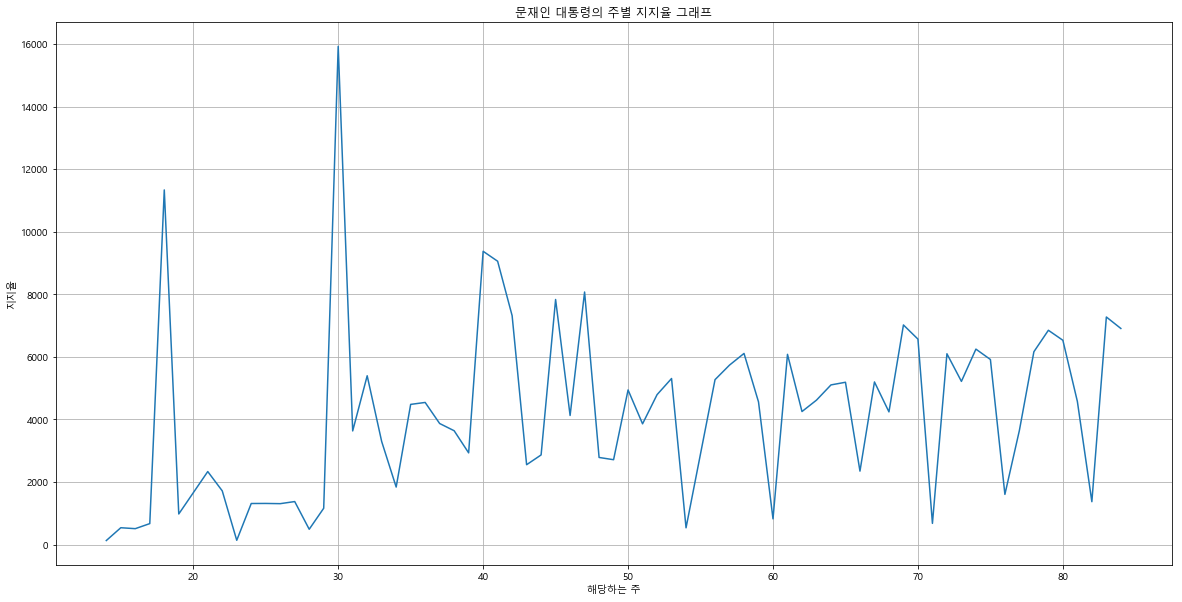

In [187]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,petition_num)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")
plt.show()

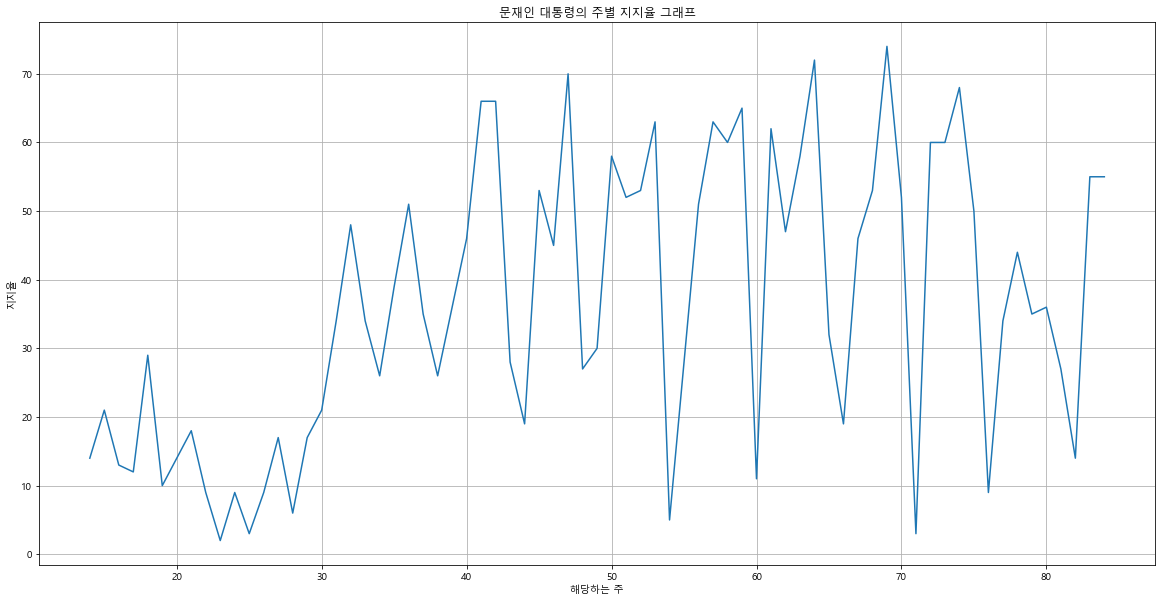

In [188]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,petition_num_up1000)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")
plt.show()

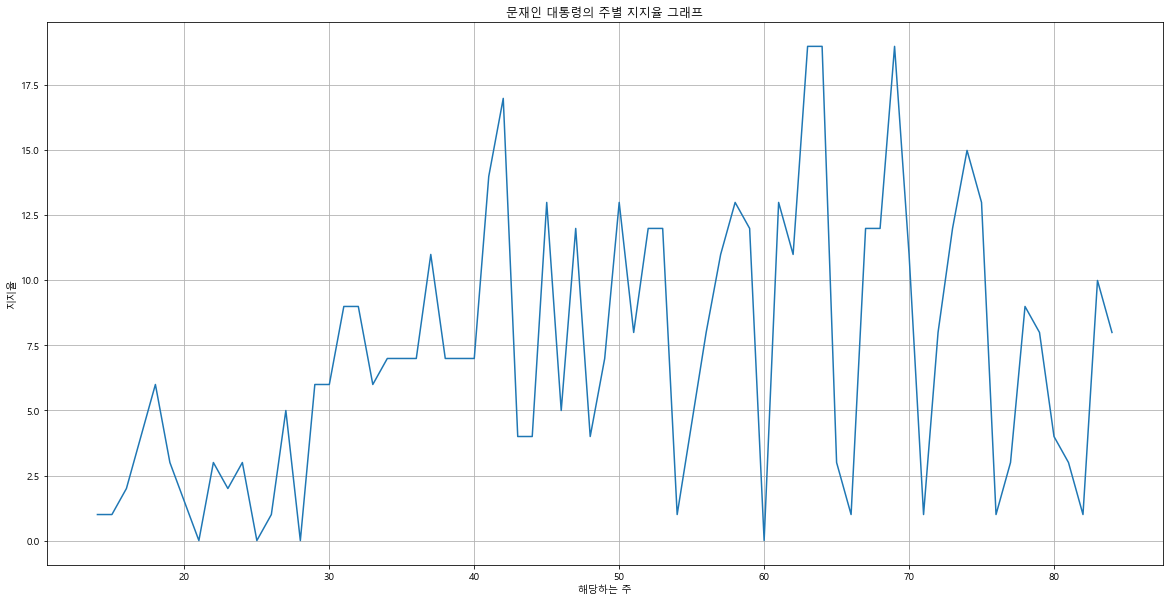

In [189]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,petition_num_up10000)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")
plt.show()

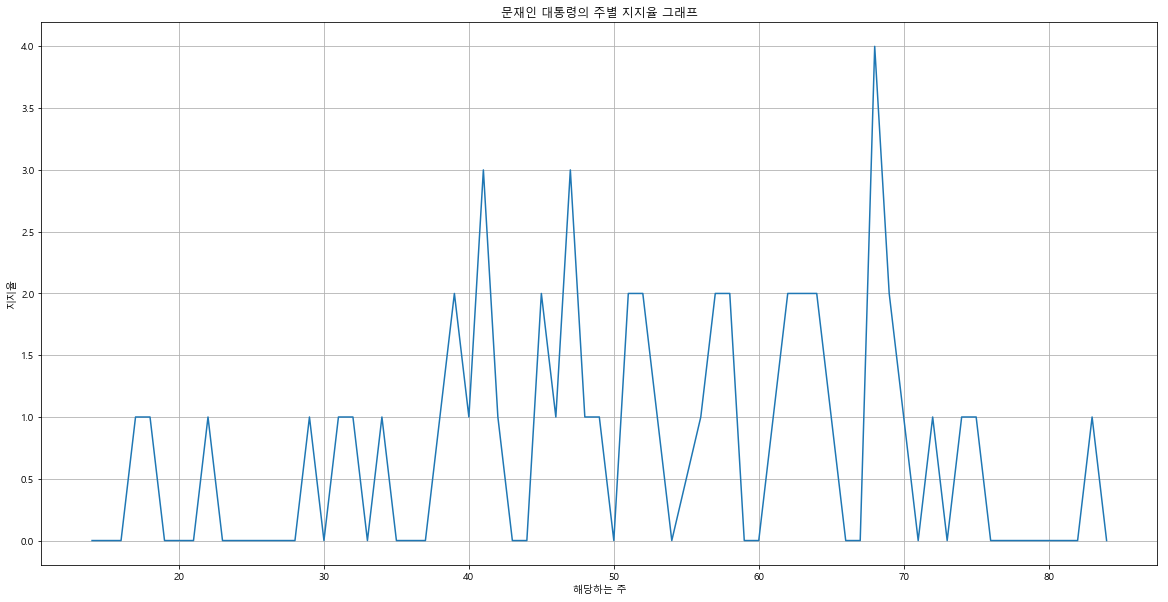

In [190]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,petition_num_up200000)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")
plt.show()

In [191]:
ntest = test[14 : 83]

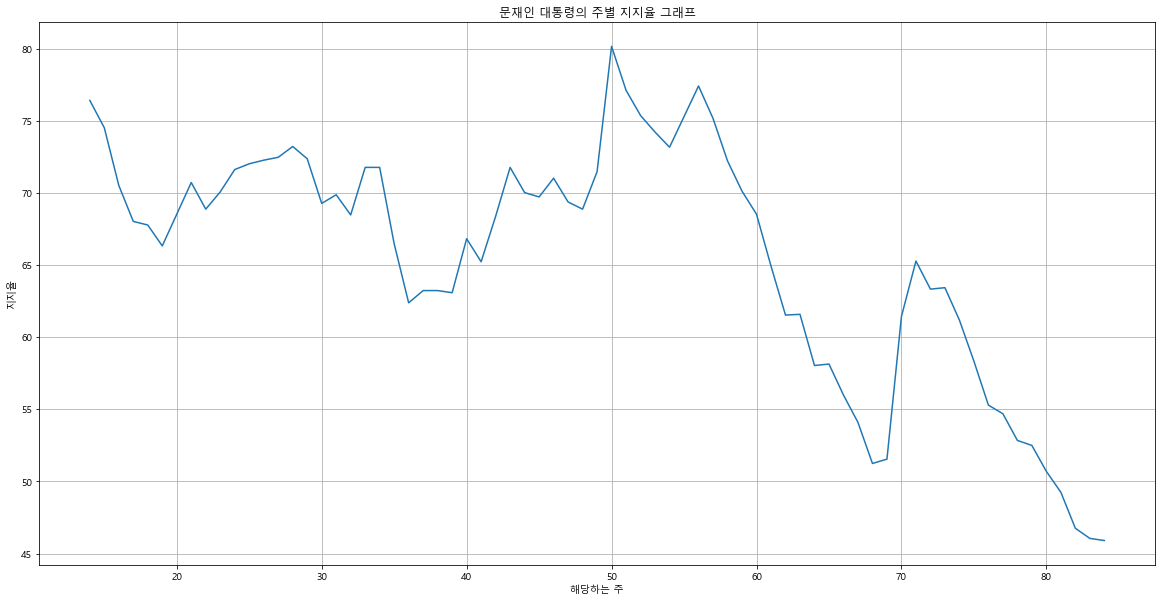

In [192]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,ntest)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

In [294]:
diffs = [0]
updo = []
r = ntest[0]
for i in ntest[1:]:
    diffs.append(i - r)
    updo.append((i - r > 0))
    r = i

In [295]:
diffs

[0,
 -1.9000000000000057,
 -4.0,
 -2.5,
 -0.25,
 -1.4500000000000028,
 4.400000000000006,
 -1.8499999999999943,
 1.1999999999999886,
 1.5500000000000114,
 0.3999999999999915,
 0.25,
 0.20000000000000284,
 0.75,
 -0.8499999999999943,
 -3.1000000000000085,
 0.6000000000000085,
 -1.4000000000000057,
 3.299999999999997,
 0.0,
 -5.299999999999997,
 -4.100000000000001,
 0.8500000000000014,
 0.0,
 -0.14999999999999858,
 3.749999999999993,
 -1.5999999999999943,
 3.1500000000000057,
 3.3999999999999915,
 -1.75,
 -0.29999999999999716,
 1.2999999999999972,
 -1.6499999999999915,
 -0.5,
 2.5999999999999943,
 8.700000000000003,
 -3.049999999999997,
 -1.75,
 -1.1500000000000057,
 -1.0499999999999972,
 4.25,
 -2.25,
 -2.950000000000003,
 -2.0999999999999943,
 -1.6000000000000085,
 -3.5999999999999943,
 -3.4000000000000057,
 0.05000000000000426,
 -3.5500000000000043,
 0.10000000000000142,
 -2.1499999999999986,
 -1.8999999999999986,
 -2.8500000000000014,
 0.29999999999999716,
 9.900000000000006,
 3.8499

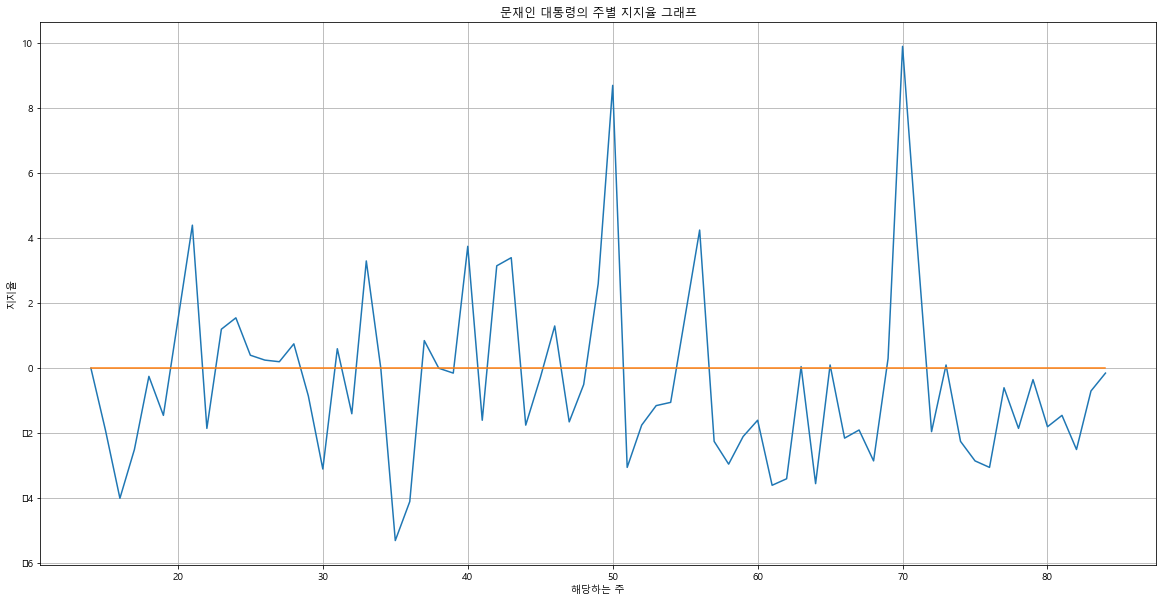

In [296]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,diffs)
plt.plot(nd,[0 for _ in nd])

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

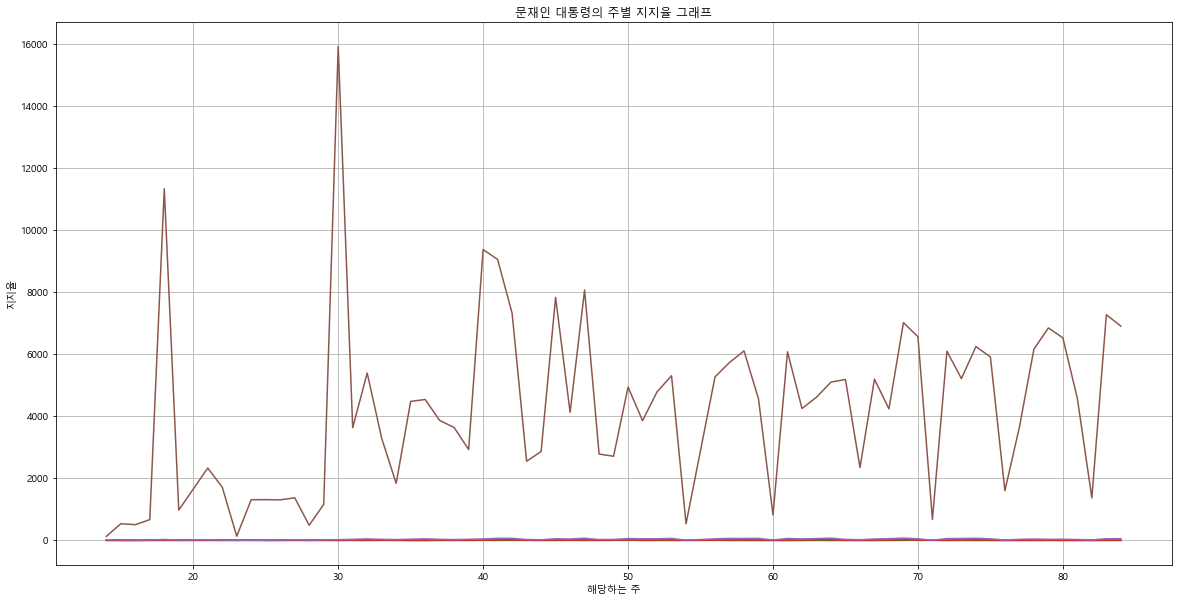

In [196]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,diffs)
plt.plot(nd,[0 for _ in nd])
plt.plot(nd,petition_num_up200000)
plt.plot(nd,petition_num_up10000)
plt.plot(nd,petition_num_up1000)
plt.plot(nd,petition_num)

plt.grid()
#plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

In [298]:
my_dict = {"차이": diffs, "추천 1000개 이상": petition_num_up1000,"추천 10000개 이상": petition_num_up10000,
           "추천 200000개 이상": petition_num_up200000, "청원전체": petition_num, "지지율":ntest, "대통령 주":dd[14 : 83]}
df = pd.DataFrame(my_dict)
df

,차이,추천 1000개 이상,추천 10000개 이상,추천 200000개 이상,청원전체,지지율,대통령 주
0,0.00,14,1,0,127,76.45,14
1,-1.90,21,1,0,537,74.55,15
2,-4.00,13,2,0,507,70.55,16
3,-2.50,12,4,1,669,68.05,17
4,-0.25,29,6,1,11344,67.80,18
5,-1.45,10,3,0,977,66.35,19
6,4.40,18,0,0,2334,70.75,21
7,-1.85,9,3,1,1716,68.90,22
8,1.20,2,2,0,135,70.10,23
9,1.55,9,3,0,1312,71.65,24


In [304]:
df.to_csv("rating_information.csv", index=False)

In [300]:
names = list(df)
names

['차이', '추천 1000개 이상', '추천 10000개 이상', '추천 200000개 이상', '청원전체', '지지율', '대통령 주']

In [301]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfs = pd.DataFrame(x_scaled,  columns= names)
dfs

,차이,추천 1000개 이상,추천 10000개 이상,추천 200000개 이상,청원전체,지지율,대통령 주
0,0.348684,0.166667,0.052632,0.00,0.000000,0.890671,0.000000
1,0.223684,0.263889,0.052632,0.00,0.025933,0.835277,0.014286
2,0.085526,0.152778,0.105263,0.00,0.024035,0.718659,0.028571
3,0.184211,0.138889,0.210526,0.25,0.034282,0.645773,0.042857
4,0.332237,0.375000,0.315789,0.25,0.709488,0.638484,0.057143
5,0.253289,0.111111,0.157895,0.00,0.053763,0.596210,0.071429
6,0.638158,0.222222,0.000000,0.00,0.139595,0.724490,0.100000
7,0.226974,0.097222,0.157895,0.25,0.100506,0.670554,0.114286
8,0.427632,0.000000,0.105263,0.00,0.000506,0.705539,0.128571
9,0.450658,0.097222,0.157895,0.00,0.074953,0.750729,0.142857


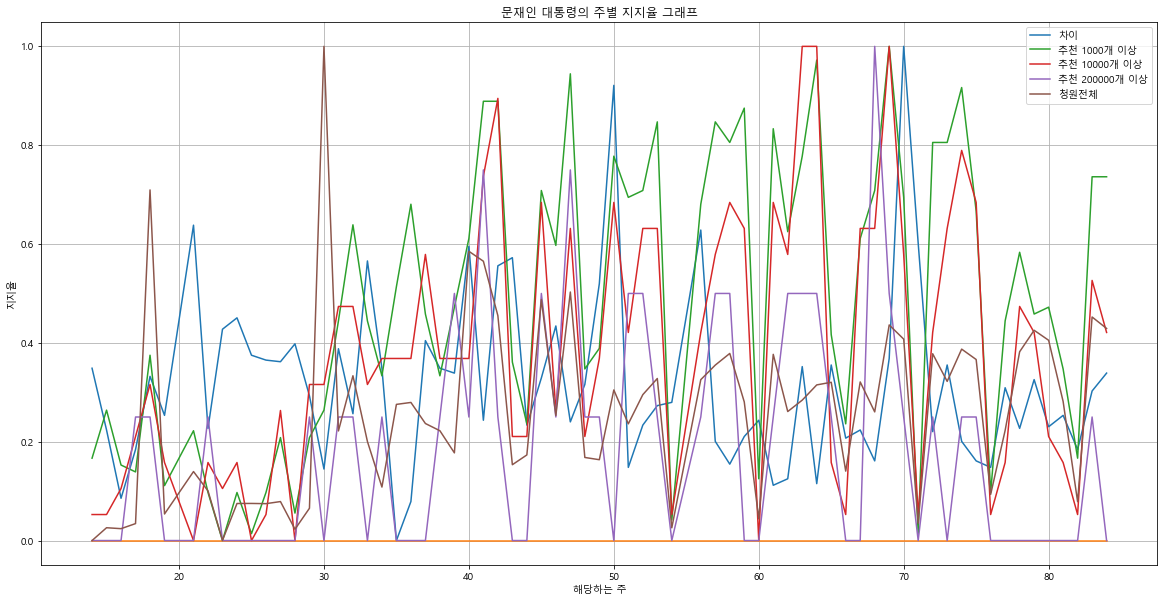

In [324]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["차이"]),label="차이")
plt.plot(nd,[0 for _ in nd])
plt.plot(nd,list(dfs["추천 1000개 이상"]),label="추천 1000개 이상")
plt.plot(nd,list(dfs["추천 10000개 이상"]),label="추천 10000개 이상")
plt.plot(nd,list(dfs["추천 200000개 이상"]),label="추천 200000개 이상")
plt.plot(nd,list(dfs["청원전체"]),label="청원전체")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

In [ ]:
plt.scatter(nd,list(dfs["지지율"]),label="지지율")

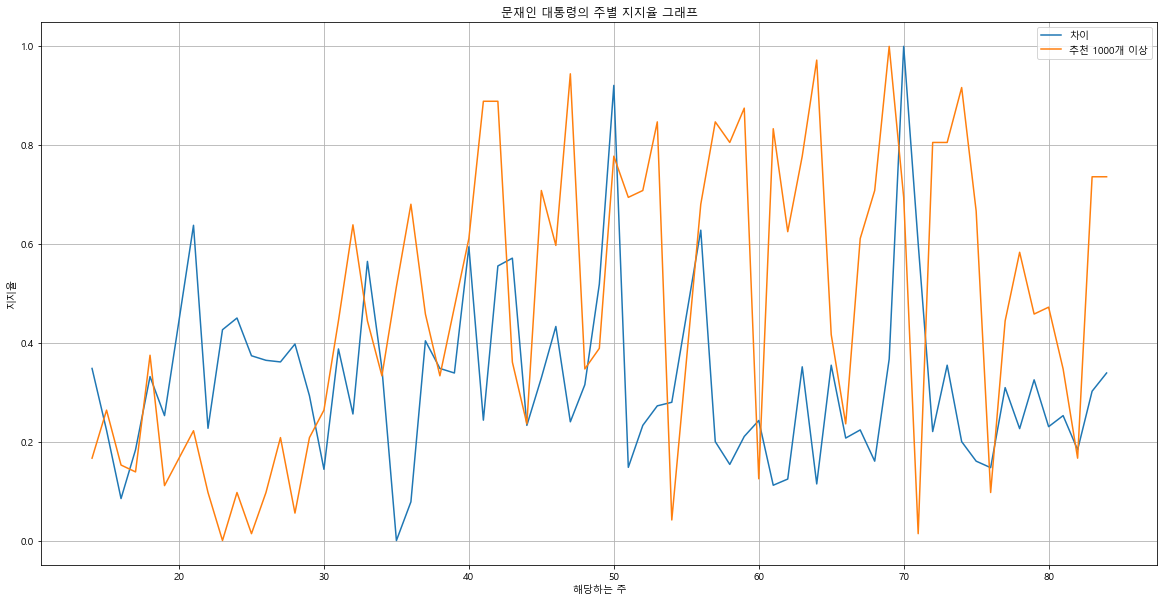

In [286]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["차이"]),label="차이")
plt.plot(nd,list(dfs["추천 1000개 이상"]),label="추천 1000개 이상")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

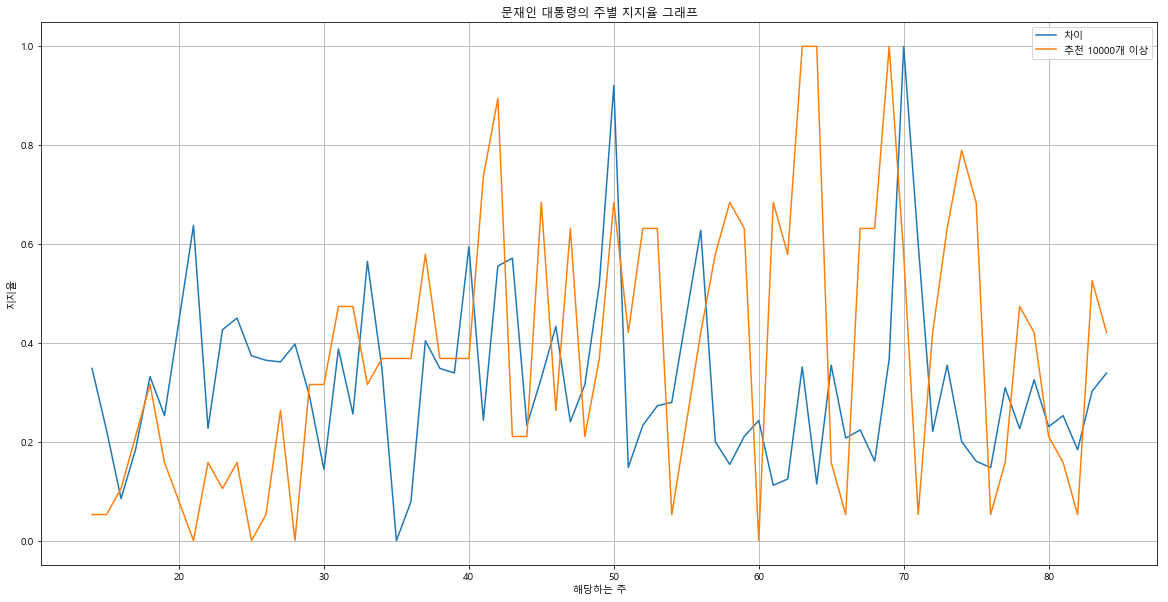

In [256]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["차이"]),label="차이")
plt.plot(nd,list(dfs["추천 10000개 이상"]),label="추천 10000개 이상")
plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

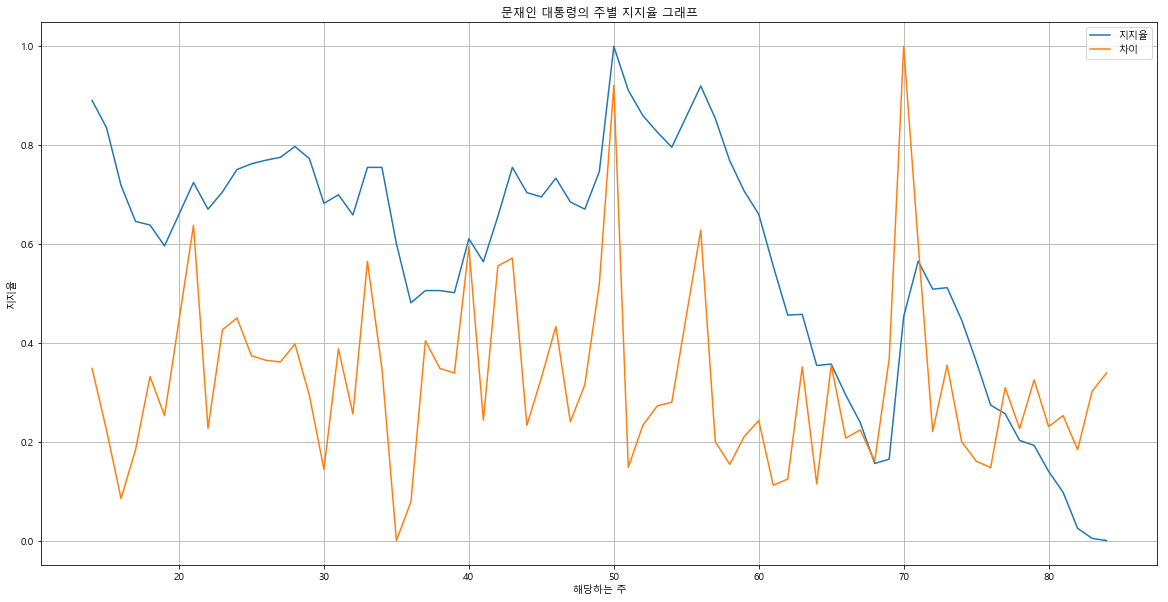

In [288]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["지지율"]),label="지지율")
plt.plot(nd,list(dfs["차이"]),label="차이")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

In [289]:
!pip install plotly

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


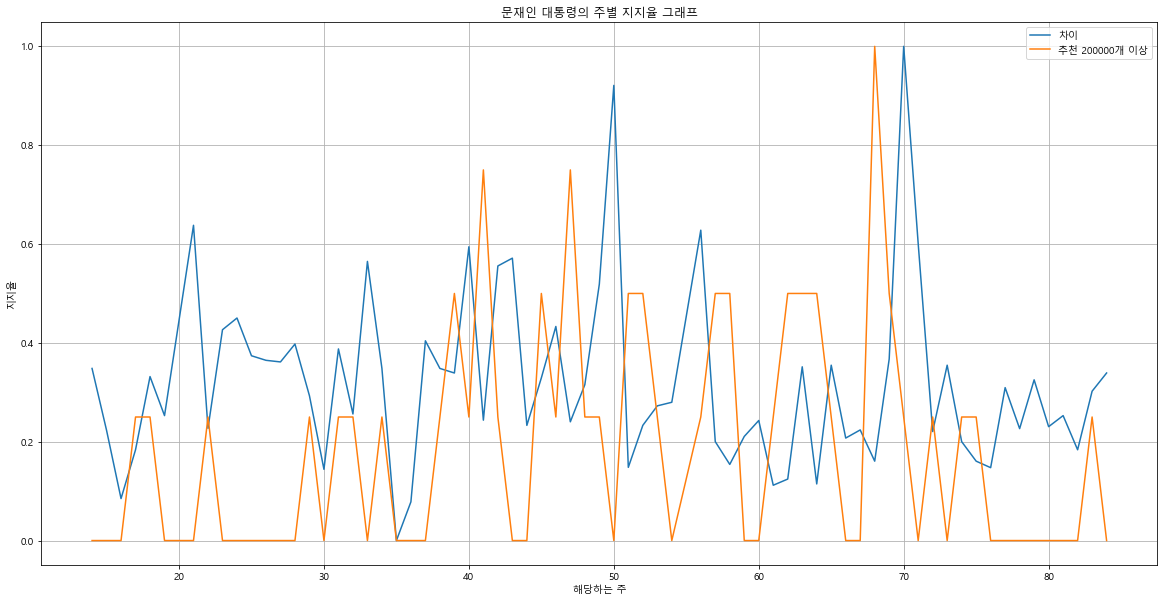

In [290]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["차이"]),label="차이")
plt.plot(nd,list(dfs["추천 200000개 이상"]),label="추천 200000개 이상")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

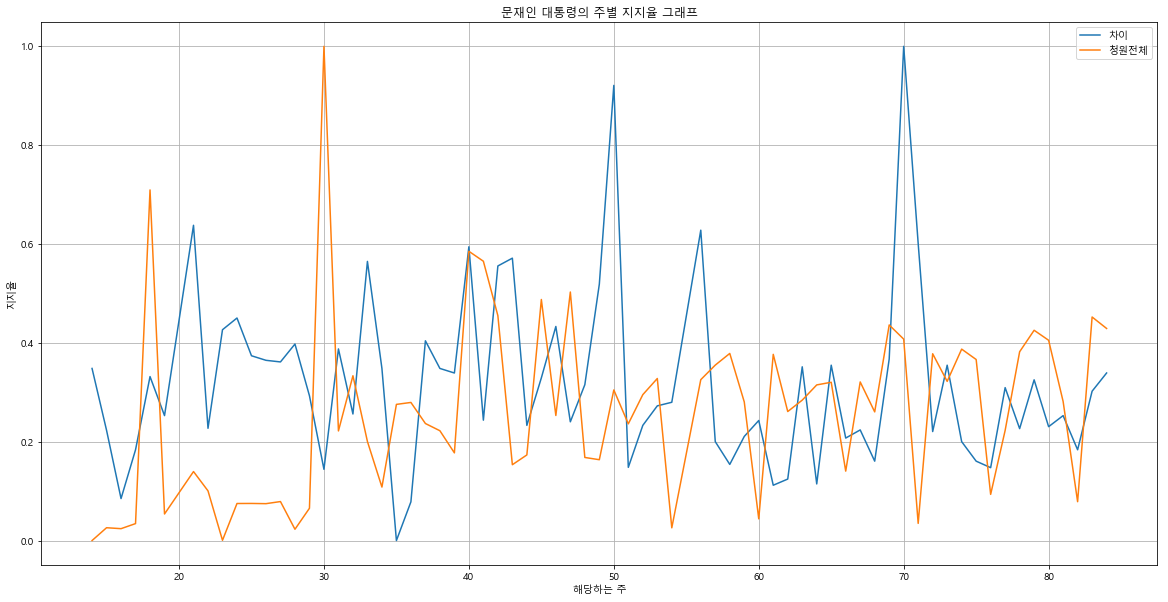

In [258]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.plot(nd,list(dfs["차이"]),label="차이")
plt.plot(nd,list(dfs["청원전체"]),label="청원전체")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

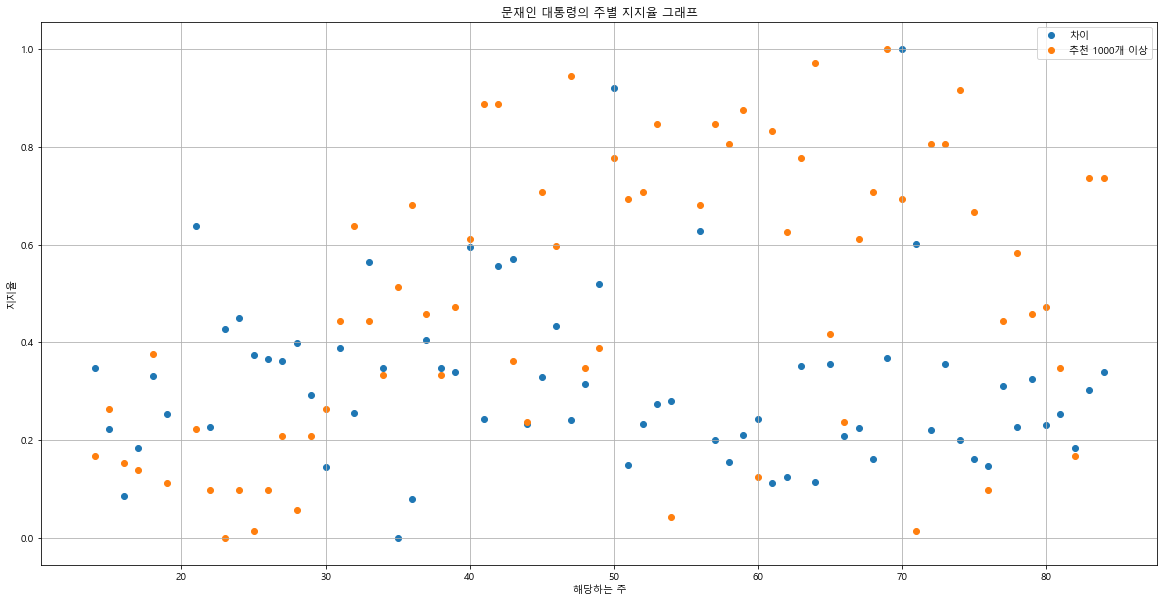

In [278]:
mpl.rc('font', family = font_name)

plt.subplots(1, figsize = (20,10)) # 크기 지정 

plt.scatter(nd,list(dfs["차이"]),label="차이")

plt.scatter(nd,list(dfs["추천 1000개 이상"]),label="추천 1000개 이상")

plt.grid()
plt.legend()
plt.xlabel("해당하는 주")
plt.ylabel("지지율")
plt.title("문재인 대통령의 주별 지지율 그래프")

plt.show()

In [ ]:
ㅔㅑ

In [291]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

multiple_bars = plt.figure()

x = [datetime.datetime(2011, 1, 4, 0, 0),
     datetime.datetime(2011, 1, 5, 0, 0),
     datetime.datetime(2011, 1, 6, 0, 0)]
x = date2num(x)

y = [4, 9, 2]
z=[1,2,3]
k=[11,12,13]

ax = plt.subplot(111)
ax.bar(x-0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.bar(x+0.2, k,width=0.2,color='r',align='center')
ax.xaxis_date()

plotly_fig = tls.mpl_to_plotly(multiple_bars)
py.iplot(plotly_fig, filename='mpl-multiple-bar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.